# Data Analysis

### Importing Necessary Libraries

In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### Task 1: Merging the 12 months sales data into a single csv file

In [6]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
df.head()

files = [file for file in os.listdir('./Sales_Data')]

full_year_data = pd.DataFrame()



for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    full_year_data = pd.concat([full_year_data, df])

full_year_data.to_csv("all-data_t.csv", index = False)

#### Read in updated dataframe

In [7]:
full_data = pd.read_csv("./all-data_t.csv")
full_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### What was the best month for sales and how much money was earned that month?

So, before we start to solve this problem, we should add some additional columns, like a specific column for month.

#### Augmenting data with additional columns:

* Adding the month column

In [9]:
# The easiest way is to take the first two digits of the month column and add it into a new column.
full_data['Month'] = full_data['Order Date'].str [0:2]


full_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


* Cleaning up data to remove "NaN" values:

If we don't do this, we cannot convert the month column to integer, which we need in order to do any kind of an operation on it.

In [11]:
nan_df = full_data[full_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since they are whole rows, and have no useful information in them, we can just remove them.

In [12]:
full_data = full_data.dropna(how = 'all')
full_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [13]:
full_data['Month'] = full_data['Month'].astype('int32')
full_data.head()

ValueError: invalid literal for int() with base 10: 'Or'

Lets figure out what's causing this 'or' to pop up here

In [14]:
# Making a temporary dataframe (df) to check and see where this "Or" is in our date column.
temp_df = full_data[full_data["Order Date"].str[0:2] == "Or"]
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


So we can see here that our headings are being repeated in several places. Now, if we invert this selection, we are creating a list of the rows that don't have this problem.

In [15]:
full_data = full_data[full_data["Order Date"].str[0:2] != "Or"]
full_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [17]:
full_data['Month'] = full_data['Month'].astype('int32')
full_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


Now, going back to the original question, we need to find out the total price of items which is not given here. And for that we would need to multiply 'Price Each' with 'Quantity Ordered'.

* Adding a sales column

In [18]:
# First we convert data into the right data type.

full_data['Quantity Ordered'] = pd.to_numeric(full_data['Quantity Ordered'])
full_data['Price Each'] = pd.to_numeric(full_data['Price Each'])


full_data['Sales'] = full_data['Quantity Ordered'] * full_data['Price Each']
full_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


Now we have a sales column that we can use to answer this question, by doing some grouping in the month column.

In [19]:
results = full_data.groupby('Month').sum()['Sales']
print(results)

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64


So,
#### What was the best month for sales?
December.

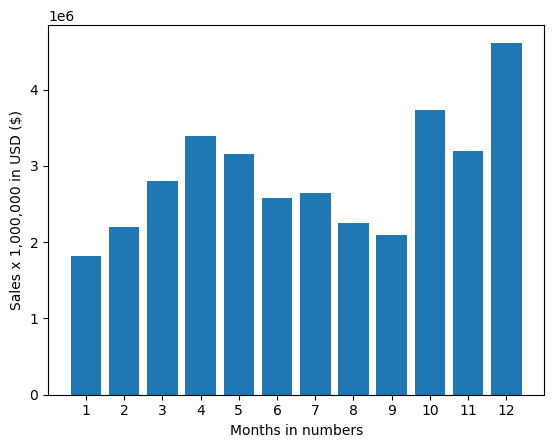

In [30]:
months = range(1,13)

plt.bar(months,results)

plt.xticks(months)
plt.ylabel("Sales x 1,000,000 in USD ($)")
plt.xlabel("Months in numbers")
plt.show()

#### What city had the highest amount of sales?

* Trying it out for myself first:

In [20]:
full_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [21]:
full_data['City Code'] = full_data['Purchase Address'].str[-8:]
full_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City Code
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,MA 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,CA 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,CA 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,CA 90001


In [23]:
result_city = full_data.groupby('City Code').sum(['Sales'])
print(result_city.shape)

(10, 4)


In [36]:
city for city in  

plt.bar(result_city)
plt.show()

TypeError: bar() missing 1 required positional argument: 'height'

So, I couldn't figure out how to seperate the name of the city from the address, and decided to go with the postal code instead. Now lets see how it's done in the tutorial.

In [24]:
# Using .apply() to make a city column:
full_data['City'] = full_data['Purchase Address'].apply(lambda x: x.split(',')[1])
# Translation:
# The 'City' column in data (which doesn't exist yet so will be newly created) = 
# The 'Purchase Address' column in data, modified by the apply function, where,
# the data is split at ','s, whenever they appear,   a n d  we want to select the index = 1 value [0,1,2]


full_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City Code,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,TX 75001,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,MA 02215,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,CA 90001,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,CA 90001,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,CA 90001,Los Angeles


Lambda x takes the value in a cell as x, then the x.split function splits it into an array as directed [at commas(,), in this case], and then from that array we just select the element we require by its index.


In [25]:
# Now to make it all a bit neater and more concise looking:

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1] 
# in this case, since there's empty space before the state code, that would be the 0th index, so the state would be the 1st

full_data['City'] = full_data['Purchase Address'].apply(lambda x: get_city(x) + " (" + get_state(x) + ")")

full_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City Code,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,TX 75001,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,MA 02215,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,CA 90001,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,CA 90001,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,CA 90001,Los Angeles (CA)


We have added the state because there may be cities of the same name in different states, which we need to differentiate.

In [27]:
results_city = full_data.groupby('City').sum(['Sales'])
results_city

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


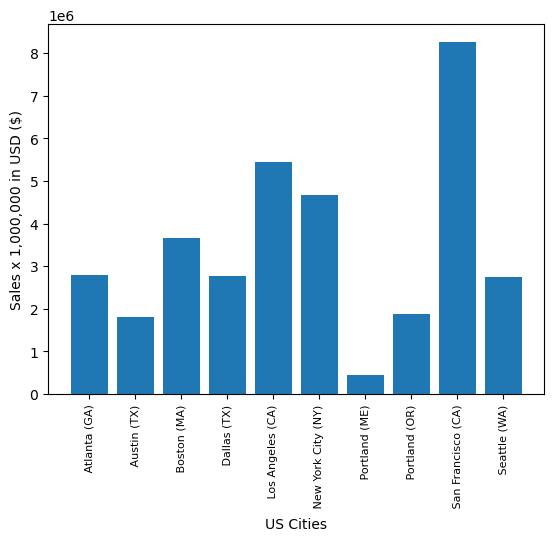

In [28]:
cities = [city for city, df in full_data.groupby('City')]

# This creates a cities variable where cities are listed in the same order as the data.
plt.bar(cities,results_city['Sales'])
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.ylabel("Sales x 1,000,000 in USD ($)")
plt.xlabel("US Cities")
plt.show()

#### What time should we display advertisements to maximise the likelihood of the customer buying the product?

So, the first thing to do is to extract the time out of the order date column, and while we can do it in the same way we did with extracting the cities, states or the state codes, It is better and more rigorous to do it using the datetime conversion

In [29]:
full_data['Order Date'] = pd.to_datetime(full_data['Order Date'])
full_data.head()

/tmp/ipykernel_692154/2206493527.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  full_data['Order Date'] = pd.to_datetime(full_data['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City Code,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,TX 75001,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,MA 02215,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,CA 90001,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,CA 90001,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,CA 90001,Los Angeles (CA)


Now, we can make an hour column:

In [30]:
full_data['Hour'] = full_data['Order Date'].dt.hour
full_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City Code,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,TX 75001,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,MA 02215,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,CA 90001,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,CA 90001,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,CA 90001,Los Angeles (CA),9


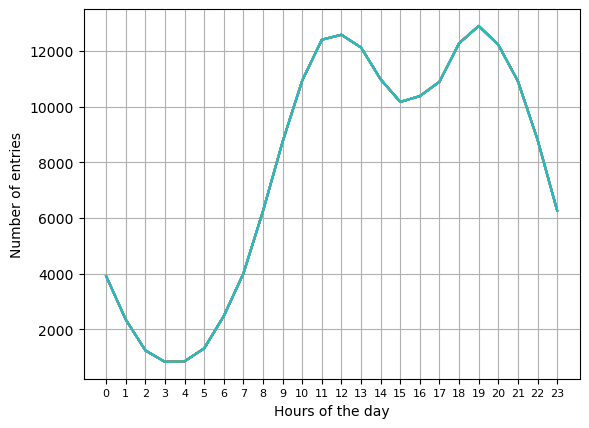

In [32]:
hours = [hour for hour,df in full_data.groupby('Hour')]

plt.plot(hours,full_data.groupby('Hour').count())
plt.xticks(hours, size = 8)
plt.grid()
plt.ylabel("Number of entries")
plt.xlabel("Hours of the day")
plt.show()

The highest amount of sales observed are between 11-13 hours and between 18-20 hours, as shown in the graph. The second peak is sharper, i.e. at around 19 hours, the sales jump up significantly and at a high rate. 

so, the best time for advertisement is 12 +-1 hours and 19+-1 hours.

#### What products are most often sold together?

So, if you look at the data, the items that were ordered together have the same order ID, which we can use to answer this question.

In [33]:
df = full_data[full_data['Order ID'].duplicated(keep = False)]
# Use shift + Tab key combination at the end of any code line to get more info.
# Basically keep=false means we keep all values that are duplicated (counterintuitive,I know).

df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City Code,City,Hour
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,CA 90001,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,CA 90001,Los Angeles (CA),14
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,CA 90001,Los Angeles (CA),19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,CA 90001,Los Angeles (CA),19
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,MA 02215,Boston (MA),11
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,MA 02215,Boston (MA),11
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,CA 94016,San Francisco (CA),17
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,CA 94016,San Francisco (CA),17
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,NY 10001,New York City (NY),11
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,NY 10001,New York City (NY),11


In [77]:
df['Grouped Products'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()

/tmp/ipykernel_182377/3280545033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped Products'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City Code,City,Hour,Grouped Products
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,CA 90001,Los Angeles (CA),14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,CA 90001,Los Angeles (CA),14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,CA 90001,Los Angeles (CA),19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,CA 90001,Los Angeles (CA),19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,MA 02215,Boston (MA),11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [79]:
# Now to drop the duplicates:

df = df[['Order ID','Grouped Products']].drop_duplicates()
df.head(20)

,Order ID,Grouped Products
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [81]:
from itertools import combinations
from collections import Counter

* Using the Counter function to count the number of pairs and triplets:

#### Most common pairs:

In [83]:
count = Counter()

for row in df['Grouped Products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))


for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Most common triplets:

In [88]:
count = Counter()

for row in df['Grouped Products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,3)))


for key,value in count.most_common(10):
    print(key,value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


#### What product sold the most, and why?

In [34]:
full_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City Code,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,TX 75001,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,MA 02215,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,CA 90001,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,CA 90001,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,CA 90001,Los Angeles (CA),9


In [35]:
full_data['Order Date'] = pd.to_numeric(full_data['Order Date'], errors = 'coerce')

results_product = full_data.groupby('Product')

results_product.sum()

,Order ID,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City Code,City,Hour
Product,,,,,,,,,,
20in Monitor,1765881766591766731766901767031767101767331767...,4129,451068.99,-6584324130923962368,"765 Cherry St, Seattle, WA 98101804 Church St,...",29336,454148.71,WA 98101TX 75001MA 02215CA 94016NY 10001TX 750...,Seattle (WA) Dallas (TX) Boston (MA) San Fran...,58764
27in 4K Gaming Monitor,1765691766001766671767221767231767431767461767...,6244,2429637.70,1813406541356746752,"657 Hill St, Dallas, TX 7500187 West St, Bosto...",44440,2435097.56,TX 75001MA 02215CA 90001NY 10001OR 97035GA 303...,Dallas (TX) Boston (MA) Los Angeles (CA) New ...,90916
27in FHD Monitor,1765871766231766481766691767351767561767791768...,7550,1125974.93,3817567600725172224,"557 5th St, Los Angeles, CA 90001807 12th St, ...",52558,1132424.50,CA 90001GA 30301OR 97035TX 75001TX 73301NY 100...,Los Angeles (CA) Atlanta (GA) Portland (OR) D...,107540
34in Ultrawide Monitor,1766621766771766851767001767391767541767581767...,6199,2348718.19,-3055348223805046784,"678 Hickory St, Portland, OR 97035661 Washingt...",43304,2355558.01,OR 97035TX 73301NY 10001TX 75001TX 73301CA 900...,Portland (OR) Austin (TX) New York City (NY) ...,89076
AA Batteries (4-pack),1765701765791766141766221766241766361766421766...,27635,79015.68,1528041790541981696,"186 12th St, Dallas, TX 75001886 Jefferson St,...",145558,106118.40,TX 75001NY 10001CA 94016CA 94016WA 98101MA 022...,Dallas (TX) New York City (NY) San Francisco ...,298342
AAA Batteries (4-pack),1765751765831765861765981766071766101766251766...,31017,61716.59,-8061653411715328000,"433 Hill St, New York City, NY 10001146 Jackso...",146370,92740.83,NY 10001OR 97035CA 94016CA 94016MA 02215TX 750...,New York City (NY) Portland (OR) San Francisc...,297332
Apple Airpods Headphones,1765721765761765771765781765911765961766091766...,15661,2332350.00,-2887662149189029888,"149 Dogwood St, New York City, NY 10001771 Rid...",109477,2349150.00,NY 10001CA 90001TX 75001MA 02215TX 73301TX 750...,New York City (NY) Los Angeles (CA) Dallas (T...,223304
Bose SoundSport Headphones,1765591765631765821765851765851766111766261766...,13457,1332366.75,7271434961916225536,"682 Chestnut St, Boston, MA 02215668 Center St...",94113,1345565.43,MA 02215WA 98101GA 30301MA 02215MA 02215CA 940...,Boston (MA) Seattle (WA) Atlanta (GA) Boston ...,192445
Flatscreen TV,1765841766191766881767111767191767481768791768...,4819,1440000.00,-2160981459787507712,"936 Church St, San Francisco, CA 94016116 Nort...",34224,1445700.00,CA 94016CA 90001CA 94016TX 75001MA 02215MA 022...,San Francisco (CA) Los Angeles (CA) San Franc...,68815


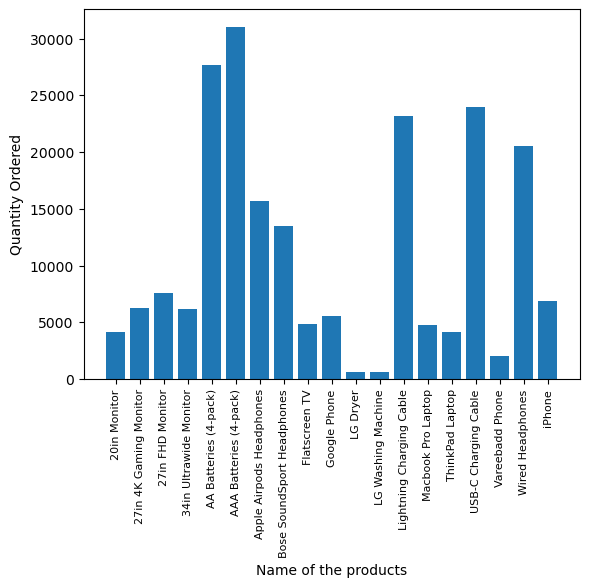

In [43]:
quantity_ordered = results_product.sum()['Quantity Ordered']
products = [product for product, df in results_product ]

plt.bar(products,quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Name of the products')

plt.xticks(products,rotation = 'vertical',size = 8)

plt.show()

In [41]:


prices = full_data.groupby('Product').mean(['Price Each'])
print(prices)


                            Quantity Ordered  Price Each    Order Date  \
Product                                                                  
20in Monitor                        1.006828      109.99  1.563736e+18   
27in 4K Gaming Monitor              1.002247      389.99  1.563675e+18   
27in FHD Monitor                    1.005728      149.99  1.563334e+18   
34in Ultrawide Monitor              1.002912      379.99  1.563346e+18   
AA Batteries (4-pack)               1.343004        3.84  1.563525e+18   
AAA Batteries (4-pack)              1.502689        2.99  1.563574e+18   
Apple Airpods Headphones            1.007203      150.00  1.563440e+18   
Bose SoundSport Headphones          1.009906       99.99  1.563501e+18   
Flatscreen TV                       1.003958      300.00  1.563680e+18   
Google Phone                        1.001267      600.00  1.563146e+18   
LG Dryer                            1.000000      600.00  1.562741e+18   
LG Washing Machine                  1.

/tmp/ipykernel_692154/3502487578.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation = 'vertical',size = 8)


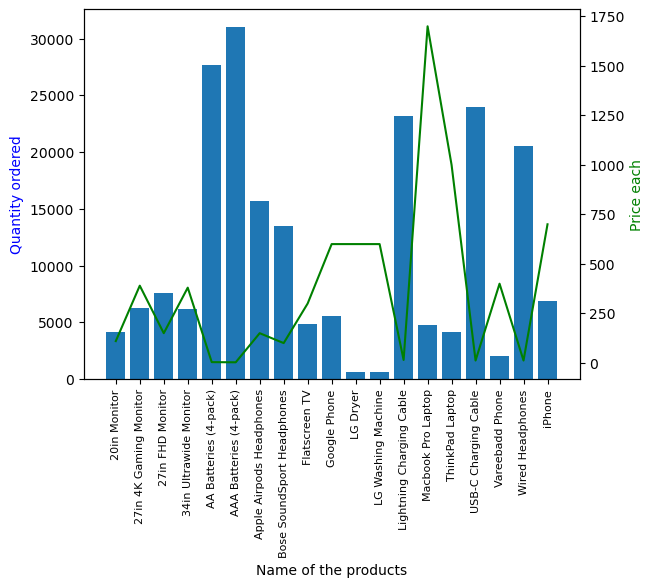

In [45]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered)
ax2.plot(products,prices['Price Each'],'g-')

ax1.set_xlabel('Name of the products')
ax1.set_ylabel('Quantity ordered', color = 'b')

ax2.set_ylabel('Price each',color = 'g')


ax1.set_xticklabels(products,rotation = 'vertical',size = 8)

plt.show()